# Live-Tutorial DSML01 Part I

**Aim:** In this notebook we discuss an end-to-end machine learning project looks. It is not important that you understand already all concepts presented here, but this notebook is more like an appetizer for the machine learning module.

# Sources

*    We closely follow Chapter 5 Supervised Learning from *Igual & Segui "Introduction to data science"* (see: Reading List - Required Reading Unit 1). The data set can be found at https://github.com/DataScienceUB/introduction-datascience-python-book/tree/master/files/ch05.

# Preambel

Here all useful imports and paths to the data are provided.

In [1]:
# Common imports
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 
import pickle # we have to import a pickle file
import os 
# from datetime import timedelta, datetime

# maximum number of columns
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Load the data

Data can be extracted from many different sources, either from simple .csv or .xlsx files, but also from databases. 

Most important commands for loading data are: 

```python
pd.read_csv()
pd.read_excel()
pd.read_sql()
pd.read_pickle()
```

In [5]:
# (x,y) = pd.read_pickle('../../../introduction-datascience-python-book-master/files/ch05/dataset_small.pkl')
# # x stores input data and y target values
# df = pd.concat([pd.DataFrame(x), pd.DataFrame(y)], axis = 1)
# flatten = lambda l: [item for sublist in l for item in sublist]
# # cols = flatten([['col_' + str(i) for i in range(df.shape[1]-1)], ['loan funded']])
# df.columns = cols

In [7]:
df = pd.read_pickle('./data/dataset_new_pickle.pkl')

In [8]:
df.head(3)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,loan funded
0,3600.0,2375.0,76.31,30000.0,15.04,0.0,27.0,0.0970,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
1,23000.0,23000.0,767.89,95000.0,16.07,0.0,20.0,0.1236,1.0,3.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,7000.0,7000.0,225.84,66000.0,6.58,0.0,6.0,0.0999,1.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [9]:
cols = ['loan_amnt','funded_amnt', 'installment',
        'annual_inc', 'dti',
        'delinq_2yrs',  
        'total_acc',
        'int_rate_clean', 'term_clean', 'emp_length_clean', 
        'home_ownership=MORTGAGE', 'home_ownership=NONE', 'home_ownership=OTHER', 
        'home_ownership=OWN','home_ownership=RENT', 'loan_funded']
len(cols)
df.columns = cols

In [87]:
df.head(3)

,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,total_acc,int_rate_clean,term_clean,emp_length_clean,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT,loan_funded
0,3600.0,2375.0,76.31,30000.0,15.04,0.0,27.0,0.0970,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
1,23000.0,23000.0,767.89,95000.0,16.07,0.0,20.0,0.1236,1.0,3.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,7000.0,7000.0,225.84,66000.0,6.58,0.0,6.0,0.0999,1.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


# Initital Analysis of Data

Important commands to start analyzing a dataset:
    
```python
df.head()
df.tail()
df.dtypes
df.info()
df.describe()
``` 

Important for finding aggregated info:
```python
df[col].value_counts()
```

Plotting histograms:
```python
df[col].hist()
```

In [ ]:
Supervised Models - Regression, Classification
Unsupervised Models 

In [20]:
df.head(3)

,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,total_acc,int_rate_clean,term_clean,emp_length_clean,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT,loan_funded
0,3600.0,2375.0,76.31,30000.0,15.04,0.0,27.0,0.0970,1.0,10.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
1,23000.0,23000.0,767.89,95000.0,16.07,0.0,20.0,0.1236,1.0,3.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,7000.0,7000.0,225.84,66000.0,6.58,0.0,6.0,0.0999,1.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [7]:
df.shape

(4140, 16)

we want to predict based on the information filled by the customer asking for a loan if it will be granted or not up to a certain threshold $thr$. We are using data from the Lending Club. Not all information is relevant to our interest, thus we detail in the following the fields we will base our prediction on:

+ annual_inc	The annual income provided by the borrower during registration.
+ delinq_2yrs	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
+ dti	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
+ earliest_cr_line	The month the borrower's earliest reported credit line was opened
+ emp_length	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
+ home_ownership	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
+ installment	The monthly payment owed by the borrower if the loan originates.
+ int_rate	Interest Rate on the loan
+ is_inc_v	Indicates if income was verified by LC, not verified, or if the income source was verified
+ last_fico_range_high	The last upper boundary of range the borrower’s FICO belongs to pulled.
+ last_fico_range_low	The last lower boundary of range the borrower’s FICO belongs to pulled.
+ fico_range_high	The upper boundary of range the borrower’s FICO belongs to.
+ fico_range_low	The lower boundary of range the borrower’s FICO belongs to.
+ mths_since_last_delinq	The number of months since the borrower's last delinquency.
+ mths_since_last_major_derog	Months since most recent 90-day or worse rating
+ open_acc	The number of open credit lines in the borrower's credit file.
+ term	The number of payments on the loan. Values are in months and can be either 36 or 60.
+ total_acc	The total number of credit lines currently in the borrower's credit file
+ loan_amnt	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

A loan applicaiton is successful if the funded amount (funded_amnt) or the funded amount by investors (funded_amnt_inv) is close to the loan amount (loan_amnt) requested. In this sense we could put a threshold in which the acceptance is based on 
$$\frac{loan - funded}{loan}\geq 0.9$$

In [ ]:
# features: explanatory variables
# target: variable one wants to forecast

Considering the accepted loans which ones are successful and can we derive some rules for success?

In [21]:
df.dtypes
# int, float, objects...

loan_amnt                  float64
funded_amnt                float64
installment                float64
annual_inc                 float64
dti                        float64
delinq_2yrs                float64
total_acc                  float64
int_rate_clean             float64
term_clean                 float64
emp_length_clean           float64
home_ownership=MORTGAGE    float64
home_ownership=NONE        float64
home_ownership=OTHER       float64
home_ownership=OWN         float64
home_ownership=RENT        float64
loan_funded                float64
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                4140 non-null   float64
 1   funded_amnt              4140 non-null   float64
 2   installment              4140 non-null   float64
 3   annual_inc               4140 non-null   float64
 4   dti                      4140 non-null   float64
 5   delinq_2yrs              4140 non-null   float64
 6   total_acc                4140 non-null   float64
 7   int_rate_clean           4140 non-null   float64
 8   term_clean               4140 non-null   float64
 9   emp_length_clean         4140 non-null   float64
 10  home_ownership=MORTGAGE  4140 non-null   float64
 11  home_ownership=NONE      4140 non-null   float64
 12  home_ownership=OTHER     4140 non-null   float64
 13  home_ownership=OWN       4140 non-null   float64
 14  home_ownership=RENT     

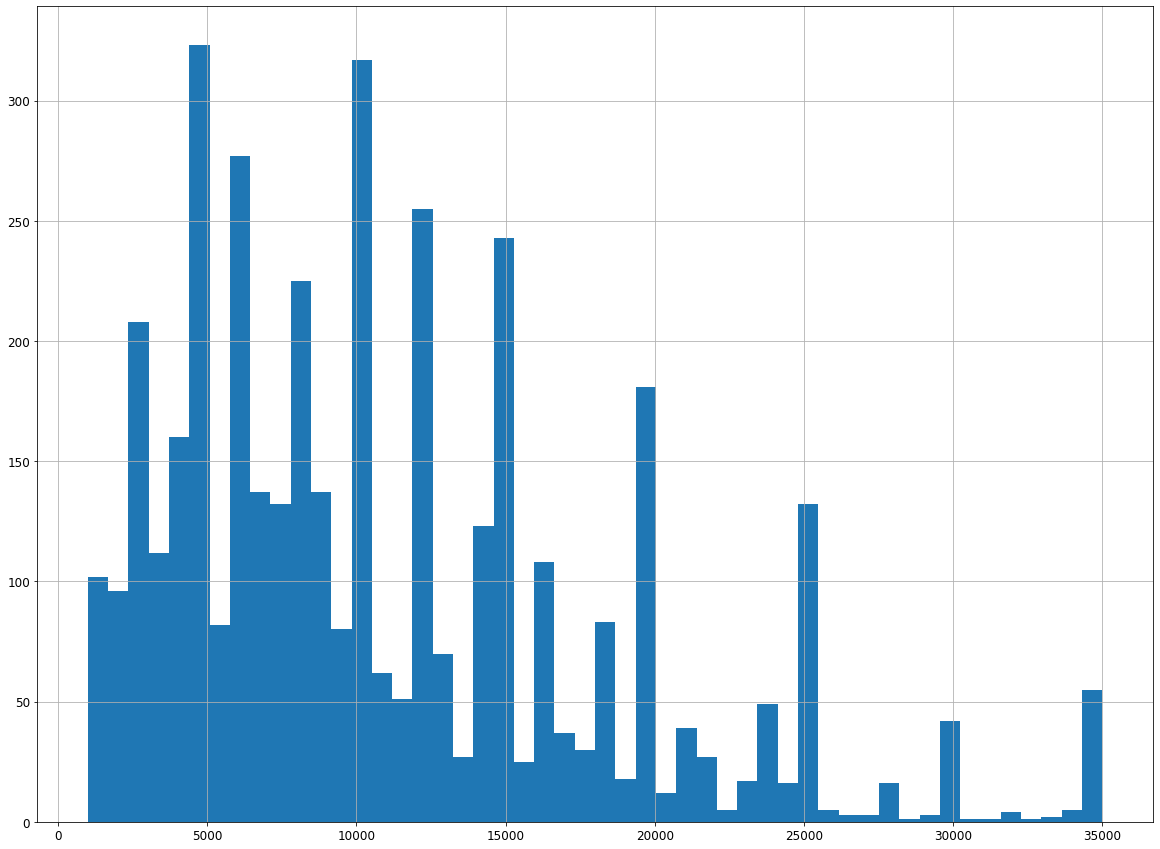

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
df['loan_amnt'].hist(bins=50, figsize=(20,15))
plt.show()

In [25]:
df['loan_funded'].value_counts(normalize = True, dropna = False)

-1.0    0.8157
 1.0    0.1843
Name: loan_funded, dtype: float64

In [ ]:
# 50%, 50%
# 80%, 20%

# 90%, 10%
# credit card fraud classification: 99% 1% imbalanced data set 

In [29]:
# number of columns (features + target) and rows (samples)
print('features: ' + str(df.shape[1]-1) + ', samples: ' + str(df.shape[0]))

features: 15, samples: 4140


Check out pandas-profiling for more details on the data set: https://github.com/pandas-profiling/pandas-profiling 

# Forecasting successful loans

## Scikit-Learn

**Scikit-learn** is a machine learning library built from NumPy, SciPy, and Matplotlib. It offers efficient tools for common tasks in data science like classification, regression, clustering, model selection, preprocessing and so on.

All objects in Scikit-learn share a uniform API consisting of three
complementary interfaces:

*    an instance to initialize the model (e.g. LinearRegression()),
*    an estimator interface for building and fitting models (fit()),
*    a predictor interface for making predictions (predict()).

## First Simple Example 

Evaluating a model consists of the following three steps:
```python
model = sklearn.model.instance() 
model.fit()
model.predict()
```
The model is neightbors-based classification: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier: 

*sklearn: Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.*

In [31]:
from sklearn import neighbors

# feature matrix/design matrix 
X = df.drop('loan_funded', axis = 1)
# target
y = np.array(df['loan_funded'])

# Create an instance of K-nearest neighbor classifier
knn = neighbors.KNeighborsClassifier(n_neighbors = 11)
# Train the classifier
knn.fit(X, y)
# Compute the prediction according to the model
yhat = knn.predict(X)

In [90]:
y[1]

1.0

The residual error of our model is given as $ \varepsilon = y - \hat{y} \; . $

In [47]:
# Check the result on the last example
print('Predicted value : ',  yhat[1], ' with probability for successfull loan ', knn.predict_proba(X)[1][1], ' and  real target: ',  y[1])

Predicted value :  -1.0  with probability for successfull loan  0.18181818181818182  and  real target:  1.0


In [11]:
print('With knn we receive an accuracy score of ', knn.score(X,y))

With knn we receive an accuracy score of  0.8316425120772947


In [91]:
?knn.score

In [48]:
(yhat == y).sum()/len(yhat)

0.8316425120772947

Is this a good result?

In our problem, always predicting
that the loan will be fully funded correctly predicts 81.57% of the samples. Observe
that this value is very close to that obtained score using the classifier.

Data Science Model Development: Always create a baseline model before you start creating a sophisticatated machine learning model.

## Confusion Matrix

The most important quantity is the so-called **metric**. In business it is also called a **KPI (key performance indicator)**. https://github.com/iubh/DLMDSML01/blob/main/Q_A_Sessions/AM1_performance_metrics/11_performance_metrics.ipynb 

*    True positives (TP): When the classifier predicts a sample as positive and it really
is positive.
*    False positives (FP): When the classifier predicts a sample as positive but in fact
it is negative.
*    True negatives (TN): When the classifier predicts a sample as negative and it really
is negative.
*    False negatives (FN): When the classifier predicts a sample as negative but in fact
it is positive.

In [49]:
yhat = knn.predict(X)
TP = np.sum(np.logical_and(yhat == 1, y == 1))
TN = np.sum(np.logical_and(yhat == -1, y == -1))
FP = np.sum(np.logical_and(yhat == 1, y == -1))
FN = np.sum(np.logical_and(yhat == -1, y == 1))
print('TP: '+ str(TP), ', FP: ' + str(FP))
print('FN: '+ str(FN), ', TN: ' + str(TN))

TP: 73 , FP: 7
FN: 690 , TN: 3370


In [50]:
from sklearn import metrics
metrics.confusion_matrix(y, yhat)

array([[3370,    7],
       [ 690,   73]], dtype=int64)

In [52]:
(3370+73)/(3370+73+690+7)

0.8316425120772947

## Problem of Overfitting

In [53]:
# Train a classifier using .fit()
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)
yhat = knn.predict(x)
print("classification accuracy: " + str(metrics.accuracy_score(yhat , y)))
print("confusion matrix: \n" + str(metrics.confusion_matrix(yhat , y)))

classification accuracy: 1.0
confusion matrix: 
[[3377    0]
 [   0  763]]


Training date: the subset of data which are used for learning

Testing : Apply the model to (new) unseen data

## Train-Test Split

Sklearn's train-test splitting: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

In [56]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_set.drop('loan_funded', axis = 1)
y_train = train_set['loan_funded'].copy()
X_test  = test_set.drop('loan_funded', axis = 1)
y_test  = test_set['loan_funded'].copy()

In [59]:
#Train a classifier on training data
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train , y_train)
yhat = knn.predict(X_train)
print("TRAINING STATS:")
print("classification accuracy: ", (metrics.accuracy_score(yhat , y_train)))
print("confusion matrix: \n", metrics.confusion_matrix(y_train , yhat))
print("==================")
#Check on the test set
yhat = knn.predict(X_test)
print("TESTING STATS:")
print("classification accuracy: ", metrics.accuracy_score(yhat , y_test))
print("confusion matrix: \n", metrics.confusion_matrix(yhat , y_test))

TRAINING STATS:
classification accuracy:  1.0
confusion matrix: 
 [[2719    0]
 [   0  593]]
TESTING STATS:
classification accuracy:  0.7560386473429952
confusion matrix: 
 [[573 117]
 [ 85  53]]


Our baseline model with always predicting -1 gives an accuracy of 81.5%

Observe that each time we run the process of randomly splitting the dataset and
train a classifier we obtain a different performance. 

A good simulation for approximating the test error is to run this process many times and average the performances.

In [78]:
# Spitting done by using the tools provided by sklearn:
acc = []
for i in range(10):
    train_set, test_set = train_test_split(df, test_size=0.2)

    X_train = train_set.drop('loan_funded', axis = 1)
    y_train = train_set['loan_funded'].copy()
    X_test  = test_set.drop('loan_funded', axis = 1)
    y_test  = test_set['loan_funded'].copy()
    
    print('Run :', i, ' accuracy : ', metrics.accuracy_score(yhat , y_test))
    acc.append(metrics.accuracy_score(yhat, y_test))

print()
print("Mean expected error:" + str(np.mean(acc)))

Run : 0  accuracy :  0.7246376811594203
Run : 1  accuracy :  0.7125603864734299
Run : 2  accuracy :  0.716183574879227
Run : 3  accuracy :  0.717391304347826
Run : 4  accuracy :  0.7318840579710145
Run : 5  accuracy :  0.717391304347826
Run : 6  accuracy :  0.716183574879227
Run : 7  accuracy :  0.717391304347826
Run : 8  accuracy :  0.714975845410628
Run : 9  accuracy :  0.7185990338164251

Mean expected error:0.718719806763285


## Train-Test Error

**Train error $E_{train}$**: The training error is the error measured over all the samples in the training set

**Test error $E_{test}$**: The test error or generalization error measures the expected error on unseen data.

The aim of any machine learning model is $E_{test} \approx E_{train}$.

## Comparing different classifiers

In [79]:
from sklearn import tree
from sklearn import svm

acc_nn1 = [];
acc_nn3 = [];
acc_svc = [];
acc_dt  = [];
for i in range(10):
    X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)
    
    nn1 = neighbors.KNeighborsClassifier(n_neighbors = 1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
    svc = svm.SVC() # support vector classifier
    dt = tree.DecisionTreeClassifier () # decision trees
    
    nn1.fit(X_train , y_train)
    nn3.fit(X_train , y_train)
    svc.fit(X_train , y_train)
    dt.fit(X_train , y_train)
    
    # always compare on the test set
    yhat_nn1 = nn1.predict(X_test)
    yhat_nn3 = nn3.predict(X_test)
    yhat_svc = svc.predict(X_test)
    yhat_dt  = dt.predict(X_test)
    
    acc_nn1.append(metrics.accuracy_score(yhat_nn1 , y_test))
    acc_nn3.append(metrics.accuracy_score(yhat_nn3 , y_test))
    acc_svc.append(metrics.accuracy_score(yhat_svc , y_test))
    acc_dt.append(metrics.accuracy_score(yhat_dt , y_test))

In [80]:
compare_acc = pd.DataFrame({
    "nn1": acc_nn1,
    "nn3": acc_nn3,
    "svc": acc_svc,
    "dt" : acc_dt})

In [81]:
compare_acc

,nn1,nn3,svc,dt
0,0.748792,0.794686,0.809179,0.757246
1,0.741546,0.775362,0.807971,0.763285
2,0.758454,0.787440,0.794686,0.765700
3,0.747585,0.798309,0.822464,0.759662
4,0.757246,0.791063,0.821256,0.760870
5,0.771739,0.826087,0.849034,0.759662
6,0.736715,0.774155,0.810386,0.753623
7,0.778986,0.823671,0.840580,0.785024
8,0.766908,0.818841,0.836957,0.769324
9,0.759662,0.807971,0.824879,0.771739


Evaluating the model several times on different training and test instances is called 
**cross-validation**: https://scikit-learn.org/stable/modules/cross_validation.html.

## Hyperparameter Search on the Validation Set

Find for a given algorihm the best parameters

In [82]:
from sklearn.model_selection import KFold
# Create a 10-fold cross -validation set
X  = np.array(X)
kf = KFold(n_splits = 10, shuffle = True , random_state = 0)

# Search for the parameter among the following:
C   = np.arange(2, 20,)

acc = np.zeros ((10, len(C)))
i = 0
for train_index , val_index in kf.split(X):
    # print("TRAIN:", train_index, "VAL:", val_index)
    X_train , X_val = X[train_index], X[val_index]
    y_train , y_val = y[train_index], y[val_index]
    j = 0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = c)
        dt.fit(X_train, y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat , y_val)
        j = j + 1
    i = i + 1

In [83]:
acc[0]

array([0.81884058, 0.8236715 , 0.83091787, 0.83574879, 0.83091787,
       0.83091787, 0.81642512, 0.82125604, 0.80917874, 0.82608696,
       0.81884058, 0.81400966, 0.81642512, 0.8115942 , 0.80917874,
       0.79710145, 0.79951691, 0.80917874])

In [84]:
print('Mean accuracy: ' + str(np.mean(acc , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc , axis = 0))))

Mean accuracy: [0.82536232 0.8263285  0.83188406 0.83429952 0.83502415 0.83333333
 0.82777778 0.82487923 0.82077295 0.82004831 0.81304348 0.80821256
 0.80434783 0.8        0.80169082 0.78574879 0.7826087  0.78019324]
Selected model index: 4


The best average accuracy is obtained by the fifth model, a maximum depth of 6. Although we can report that the best accuracy is estimated to be found with a complexity value of 6, we cannot say anything about
the value it will achieve. Therefore we need to test it on a held-out **test set**.

In [85]:
# Train the model with the complete training set with the selected complexity
dt = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = C[np.argmax(np.mean(acc , axis = 0))])
dt.fit(X_train ,y_train)
# Test the model with the test set
yhat = dt.predict(X_test)
print('Test accuracy: ' + str(metrics.accuracy_score(yhat , y_test)))

Test accuracy: 0.8586956521739131


## Nested Cross-Validation

This is something which is not very common, but best practice.

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV # hyperparameter search as a parallel process 

parameters = {'C': [1e4, 1e5],
              'gamma': [1e-5, 1e-4]}

N_splits = 5
kf      = KFold(n_splits = N_splits, shuffle = True, random_state = 0)
acc     = np.zeros((N_splits,))

i = 0

# We will build the predicted y from the partial predictions on the test of each of the folds
yhat = y.copy()

for train_index, test_index in kf.split(X):
    print(i)
    X_train , X_test = X[train_index ,:], X[test_index ,:]
    y_train , y_test = y[train_index], y[test_index]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    clf = svm.SVC(kernel = 'rbf')
    clf = GridSearchCV(clf, parameters , cv = 2, n_jobs = -1, verbose=5)
    clf.fit(X_train, y_train)
    X_test = scaler.transform(X_test)
    yhat[test_index] = clf.predict(X_test)
    i += 1
    
print(metrics.accuracy_score(y, yhat))
print(metrics.confusion_matrix(y, yhat))

0
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    2.5s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    3.6s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    5.1s finished


1
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.5s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    1.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.2s finished


2
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    1.7s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.6s finished


3
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    1.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.6s finished


4
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    1.2s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    3.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.3s finished


0.8557971014492753
[[3375    2]
 [ 595  168]]
